<a href="https://colab.research.google.com/github/glocker007/crypto/blob/main/to_do.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/content/ohlcv.csv',index_col=0)
data.head()

,timestamp,open,high,low,close,volume,quote_volume
0,1.381190e+09,123.61,123.61000,123.61,123.61,0.1000,0.0
1,1.381277e+09,123.61,124.19000,123.90,124.18,3.9916,0.0
2,1.381363e+09,124.18,124.01687,123.84,123.84,2.8230,0.0
3,1.381450e+09,123.84,125.86000,125.85,125.86,2.0000,0.0
4,1.381622e+09,125.86,127.50000,127.00,127.00,4.0000,0.0


In [5]:
to_do = data[[s for s in data.columns if s != 'timestamp']]

In [10]:
X = to_do.to_numpy()
M = np.array([X[:,i].mean() for i in range(X.shape[1])])
V = np.array([X[:,i].var() for i in range(X.shape[1])])
X = (X - M)/V**0.5
X_train = X[:int(0.7 * X.shape[0])]
X_test = X[int(0.7 * X.shape[0]):]

In [7]:
X_train[0]

array([-0.59445043, -0.59393983, -0.59668906, -0.59488497, -0.85835728,
       -0.45068767])

array([1.        , 0.66666667, 1.        ])

(1946, 5)

In [11]:
X_train = X_train[:,0:5]
X_test = X_test[:,0:5]
X_train.shape

(1946, 5)

In [12]:
tmp_list = []
tmp_test = []
for i in range(X_train.shape[0]-30):
    tmp_list.append(X_train[i:i+30])
for i in range(X_test.shape[0]-30):
    tmp_test.append(X_test[i:i+30])
X_train = np.array(tmp_list)
X_test = np.array(tmp_test)
print(X_train.shape)
X_test.shape

(1916, 30, 5)


(805, 30, 5)

In [13]:
Y_train = X_train[1:]
X_train = X_train[:-1]
Y_test = X_test[1:]
X_test = X_test[:-1]
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1915, 30, 5) (1915, 30, 5) (804, 30, 5) (804, 30, 5)


In [20]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
X_train, Y_train = torch.tensor(X_train, dtype=torch.float).cuda(), torch.tensor(Y_train, dtype=torch.float).cuda()
X_test, Y_test = torch.tensor(X_test, dtype=torch.float).cuda(), torch.tensor(Y_test, dtype=torch.float).cuda()
dataset = TensorDataset(X_train,Y_train)
trainloader = DataLoader(dataset, batch_size = 1, shuffle = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [17]:
class myGRU(nn.Module):
    def __init__(self):
        super(myGRU, self).__init__()
        self.gru = nn.GRU(5, 20 , batch_first = True)
        self.linear = nn.Linear(20,5, bias = True)
    def forward(self, x):
        h0 = torch.rand(1, x.shape[0], 20).cuda()
        x,_ = self.gru(x, h0)
        x = self.linear(x)
        return x

In [47]:
model  = myGRU().cuda()
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [21]:
L = []
L2 = []
model(X_test).shape

torch.Size([804, 30, 5])

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.is_available()

cuda:0


True

In [48]:
for epoch in range(1000):
    L2.append(torch.sum(loss(model(X_test),Y_test)).item())
    for i, (input_ , target) in  enumerate(trainloader):
        output = model(input_)
        optimizer.zero_grad()
        Loss = loss(model(input_), target)
        Loss.backward()
        optimizer.step()
        L.append(torch.sum(Loss).item())
    print(L2[-1])


2.395226240158081
1.0831842422485352
0.9823339581489563
0.9580872058868408
0.9459776878356934
0.9383999705314636
0.928487241268158
0.9220361113548279
0.9163379669189453
0.9138848781585693
0.9062283635139465
0.9025654196739197
0.9004665613174438
0.8997806906700134
0.89510577917099
0.8908281922340393
0.8894639611244202
0.8856253027915955
0.8827906250953674
0.8840661644935608
0.8803909420967102
0.8784350752830505
0.8742701411247253
0.8759229183197021
0.8737163543701172
0.8705435991287231
0.8691670298576355
0.8688210248947144
0.8647308349609375
0.8637146353721619
0.8656089305877686
0.8610644340515137
0.8638554811477661
0.861395001411438
0.8597339987754822
0.8596907258033752
0.8599718809127808
0.8580563068389893
0.8583046793937683
0.8576079607009888
0.8554327487945557
0.8546688556671143
0.8566100597381592
0.8572672009468079
0.8578951954841614
0.8544023036956787
0.8542112708091736
0.8550761938095093
0.8545079231262207
0.8555155992507935
0.8564627766609192
0.8554632663726807
0.855222046375274

KeyboardInterrupt: ignored

In [23]:
print(torch.sum(loss(model(X_test),Y_test)))

tensor(0.6845, device='cuda:0', grad_fn=<SumBackward0>)


In [53]:
print(len(L2))
len(L)

919


1752803

642
(642,) (642,)


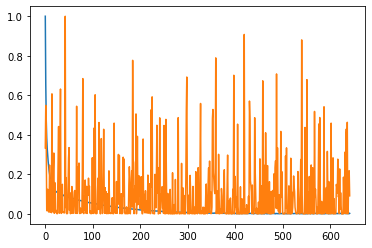

In [54]:
import matplotlib.pyplot as plt
k = 1227699//642
L3 = [L[i*k] for i in range(642)]
print(len(L3))
L3 = np.array(L3)
L2 = np.array(L2[0:642])
print(L2.shape, L3.shape)
L2 = (L2 - L2.min()) / L2.max()
L3 = (L3 - L3.min()) / L3.max() 
idx = [i for i in range(642)]
plt.plot(idx, L2, idx, L3)
plt.show()

In [32]:
torch.save(model,"/content/model.pt")

In [59]:
model = torch.load('/content/model.pt', map_location='cuda:0')

In [60]:
print(torch.sum(loss(model(X_test),Y_test)))

tensor(0.6841, device='cuda:0', grad_fn=<SumBackward0>)


In [64]:
M = torch.tensor(M).cuda()
V = torch.tensor(V).cuda()
print(M,V)

tensor([6.7257e+03, 6.9422e+03, 6.4798e+03, 6.7386e+03, 3.7632e+03, 4.0321e+07],
       device='cuda:0', dtype=torch.float64) tensor([1.2335e+08, 1.3180e+08, 1.1347e+08, 1.2365e+08, 1.9220e+07, 8.0042e+15],
       device='cuda:0', dtype=torch.float64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [91]:
pred = []
for i in range(X_test.shape[0]):
  pred.append(model(X_test[i:i+1]))
pred = torch.vstack(pred).cuda()


In [92]:
len(pred)
pred[0].shape
type(Y_test)
type(pred)
idx = [i for i in range(pred.shape[0])]
pred = pred.cpu().detach()
M = M[0:5]
V = V[0:5]
print(M.shape, V.shape)
print(pred.shape)
print(Y_test.shape)
pred = encoder(M,V,pred)
Y_lol = encoder(M,V,Y_test)
Y_lol = Y_lol.cpu().detach()

torch.Size([5]) torch.Size([5])
torch.Size([804, 30, 5])
torch.Size([804, 30, 5])


In [88]:
def encoder(M,V,x):
  return x*V**0.5 + M

In [84]:
M = M.cpu().detach()
V = V.cpu().detach()

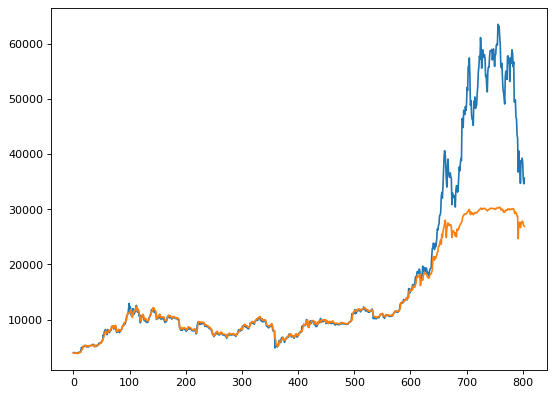

In [93]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(idx, Y_lol[:,-1,0], idx, pred[:,-1,0])
plt.show()